In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train = pd.read_csv('train.csv', index_col='id')
train = train.fillna('')
train.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
test = pd.read_csv('test.csv', index_col='id')
test = test.fillna('')
test.head()

,title,author,text
id,,,
20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...
20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


Let's start by considering what the dumbest "model" we could make is.

Randomly guessing is pretty dumb. Let's try that!

In [6]:
from random import choice
def model(text):
    options = [0, 1]
    return choice(options)

In [9]:
predictions = train.apply(model)


In [10]:
correct = 0
for prediction, actual in zip(predictions, train['label']):
    if prediction == actual:
        correct += 1
print(correct / len(predictions))

0.5


In [12]:
test['label'] = test['text'].apply(model)

submit = test.drop(['title', 'author', 'text'], axis=1)
submit.to_csv('submit.csv', index='id')
submit.head()

,label
id,
20800,1
20801,1
20802,1
20803,1
20804,1


Lets try to figure out what "fake news" has in common

We don't know which rows are fake in our test file, but we do know which ones are fake from the train file, because we have labels for that one.

Lets start by seperating the train file into reliable and unreliable articles

In [13]:
fake = train[train['label'] == 1]
real = train[train['label'] == 0]

Maybe real articles will more words?

In [14]:
fake_article_word_counts = fake['text'].str.split(' ').str.len()
real_article_word_counts = real['text'].str.split(' ').str.len()

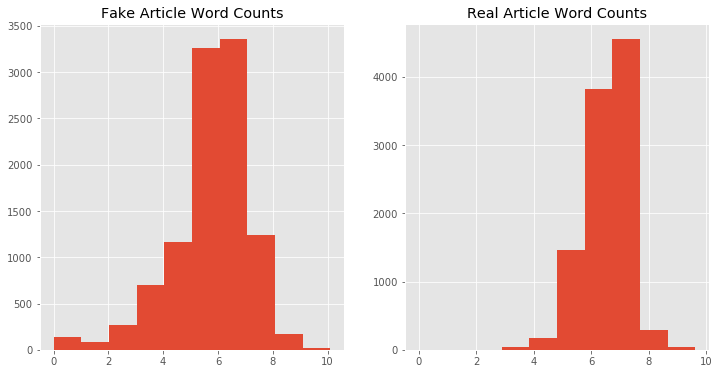

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(np.log(fake_article_word_counts))
plt.title("Fake Article Word Counts")
plt.subplot(122)
plt.hist(np.log(real_article_word_counts))
plt.title("Real Article Word Counts")
plt.show()

Doesn't look like real articles always have more words but it's difficult to tell. Lets calculate the means of each.

In [16]:
average_fake_length = fake_article_word_counts.mean()
average_real_length = real_article_word_counts.mean()
print("Average Fake Length: {}\nAverage Real Length: {}".format(average_fake_length, average_real_length))

Average Fake Length: 639.1147603956592
Average Real Length: 907.6252045826513


In [17]:
def model(text):
    # If it has more than 660 words, we'll say it's reliable
    if len(text.split()) > 660:
        return 0
    # Otherwise we'll say it's fake news
    return 1

How does our model do on our training data?

In [18]:
predictions = train['text'].apply(model)

In [19]:
correct = 0
for prediction, actual in zip(predictions, train['label']):
    if prediction == actual:
        correct += 1
print(correct / len(predictions))

0.6276923076923077


Okay so that wasn't a great model... but it's a starting point.

Next lets apply it to the test data and see how to prepare a submission.

In [20]:
test['label'] = test['text'].apply(model)
test.head()

,title,author,text,label
id,,,,
20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,1
20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [21]:
submit = test.drop(['title', 'author', 'text'], axis=1)
submit.to_csv('submit.csv', index='id')